30


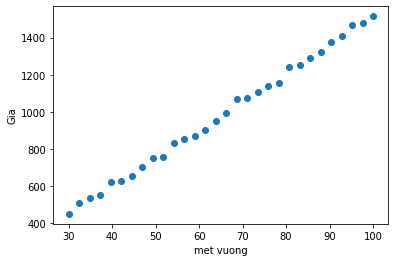

In [60]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

training_data = pd.read_csv('data.csv').values

# So luong ban ghi la so hang:
N = training_data.shape[0]
print(N)

x = training_data[:,0].reshape(-1,1)
y = training_data[:,1].reshape(-1,1)

plt.scatter(x, y)
plt.xlabel("met vuong")
plt.ylabel("Gia")
plt.show()

# Thêm init bias = 1
x = np.hstack((np.ones((N, 1)),x))

# Dự đoán đường thẳng cần tìm có dạng y = w1*x + wo
# Giả sử ban đầu (w1, wo) = (0,1)
w = np.array([0., 1.]).reshape(-1,1)

![](../../images/ml_linear_reg_1.png)

In [61]:
# Thiết lập model, loss function

def MSE_loss(y, y_pred):
    return (1/N)*(0.5*(y-y_pred)**2)

def grad(w):
    return (1/N)*(x.T.dot(x.dot(w)- y))

# Thiết lập learning rate, epochs
learning_rate = 0.000001
epochs = 100

v_old = np.array([0.,0.]).reshape(-1,1)
gama = 0.9
count = 0

# Training loop
for epoch in range(epochs):
    count +=1
    y_pred = x.dot(w)

    # Loss function
    loss  = MSE_loss(y, y_pred).mean()
    if loss < 1e-3:
        break

    # update weight
    loss_grad = grad(w)
    print("loss", loss)
    v_new = gama*v_old + learning_rate*loss_grad
    v_old = v_new
    w -= v_new
    if epoch % 10 == 0:
        print(f"w{epoch} = {w}")

print(w)
print("Dự đoán 50m2 giá: ", 50*w[1] + w[0])
print("Dự đoán 60m2 giá: ", 60*w[1] + w[0])
print("Dự đoán 100m2 giá: ", 100*w[1] + w[0])




loss 15477.636271724941
w0 = [[9.16656633e-04]
 [1.06578574e+00]]
loss 15333.6858564972
loss 15062.69705279351
loss 14681.915176229952
loss 14208.420485836466
loss 13658.74043079153
loss 13048.557039688156
loss 12392.495384386635
loss 11703.980405644981
loss 10995.150698649139
loss 10276.819109661074
w10 = [[0.04211381]
 [4.02249594]]
loss 9558.471180130731
loss 8848.293584666484
loss 8153.22573970298
loss 7479.028708202191
loss 6830.366391749364
loss 6210.894785926417
loss 5623.355780023574
loss 5069.6726110854715
loss 4551.044638790456
loss 4068.039596053241
w20 = [[0.10154428]
 [8.28846251]]
loss 3620.681895187443
loss 3208.5359358305595
loss 2830.783673564139
loss 2486.2959721805937
loss 2173.6974826790415
loss 1891.4249729758308
loss 1637.77917843799
loss 1410.9703588876832
loss 1209.1578366071228
loss 1030.4838557305116
w30 = [[ 0.14997572]
 [11.76623074]]
loss 873.1021495796996
loss 735.2016320219202
loss 615.025644545609
loss 510.8871949225707
loss 421.1806182362729
loss 344.39

Bài toán này đã áp dụng `Momentum` cho `Gradient Descent`, nếu không dùng => không ra kết quả đúng vì bị mắc kẹt tại các local minimum, có thể log ra kết quả loss để thấy rõ sự mắc kẹt.